In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
DIBUJAR_MODELOS = True

try:
    from tensorflow.keras.utils import plot_model
    import pydot
    pydot.Dot.create(pydot.Dot())
except:
    DIBUJAR_MODELOS = False
    print('No se pudo importar pydot o graphviz, por lo tanto se mostraran resumenes de los modelos enluagr de graficos')
"""Para poder correr la funcion plot_model se tiene que instalar:

Graphviz
pydot

Entonces, si se quieren ver los modelos graficametne poner DIBUJAR_MODELOS = True
De otra manera, solamente se mostrar un resumen del modelo en texto
"""

def mostrarModelo(model,**kargs):
    if DIBUJAR_MODELOS:
        return plot_model(model,**kargs)
    else:
        return model.summary()

"""
Parametros del optimizador de tensorflow:
We then use stochastic gradient descent, with a batch size 128, to optimize the network.
Funcion de coste
We use mean square error as the loss function and Adam as the optimizer.
"""
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.1.0


<h2>Creacion del dataset</h2>

In [2]:
import FEMSections as FEM
import FEMSections.FEM2D.Mesh as Mesh
import numpy as np
import matplotlib.pyplot as plt
import triangle as tri

Graficando derivada y [##################################################] 155/155


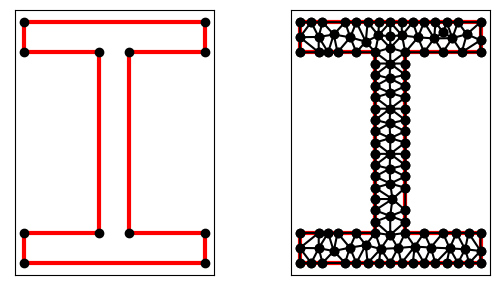

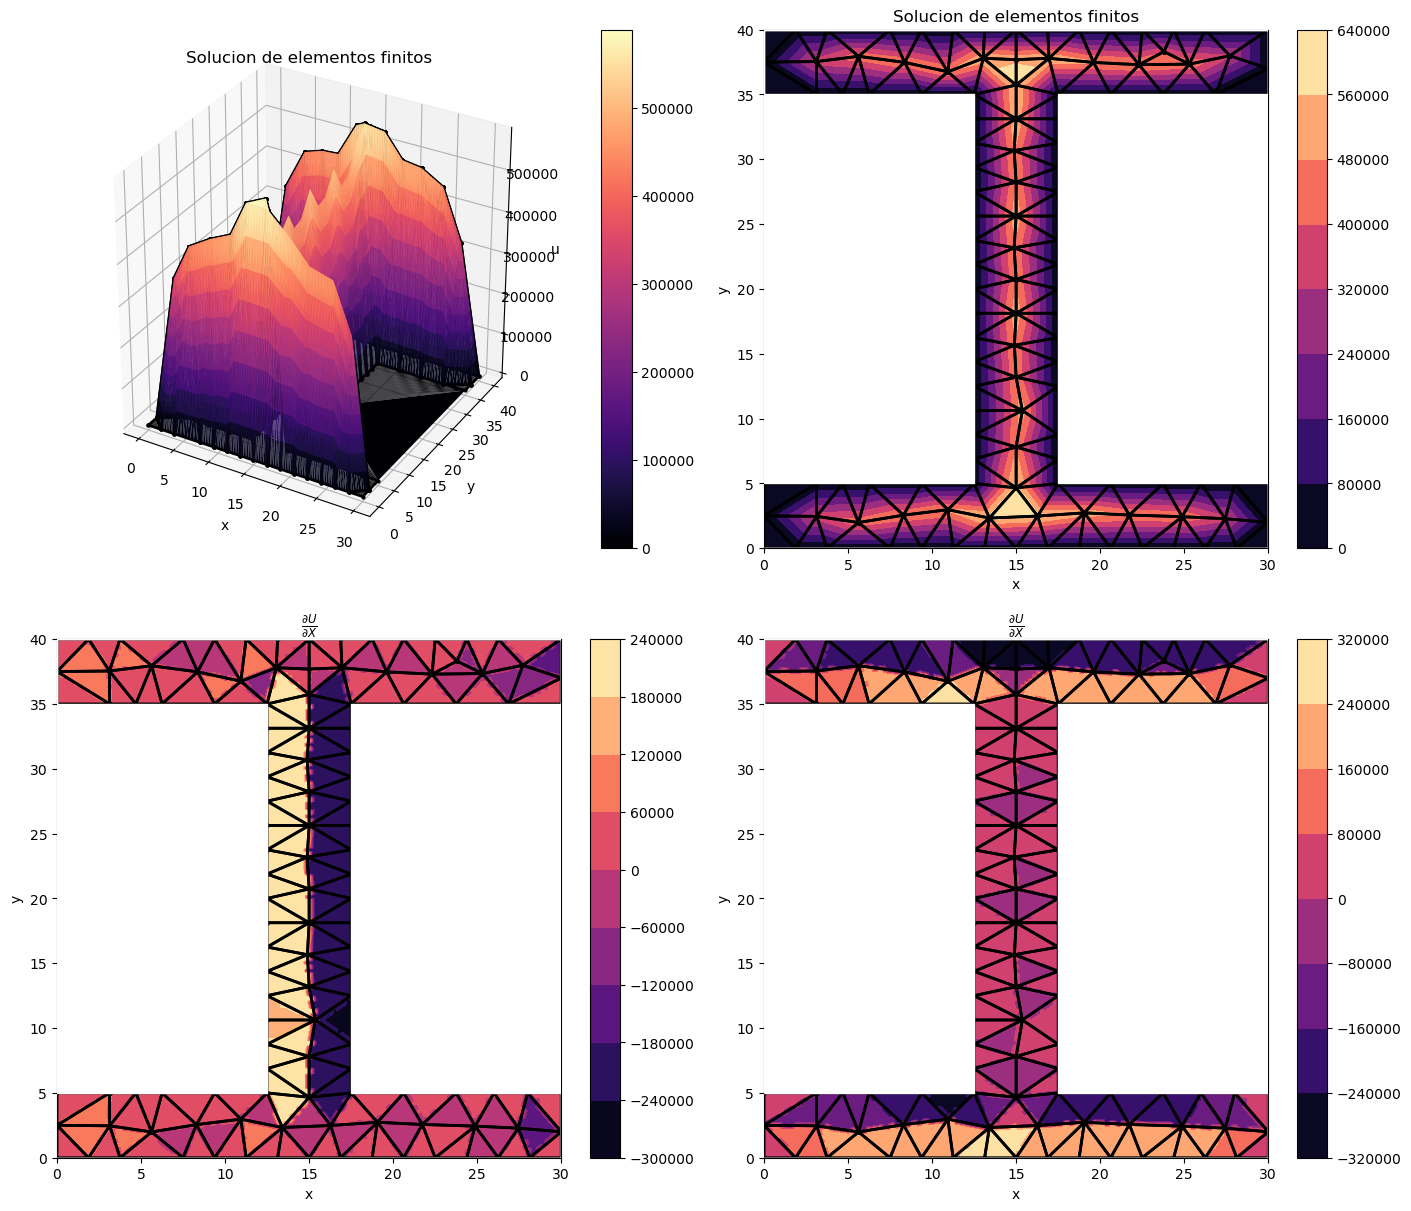

In [165]:
#En este caso no voy a entrenar sobre 3000 problemas como lo hicieron en el paper
def crearProblema(area):
    a = 30
    b = 30
    tw = 5
    tf = 5

    E = 200000
    v = 0.27
    G = E/(2*(1+v))

    params = Mesh.delaunay._strdelaunay(constrained=True,delaunay=True,a=area)
    vertices = [[0,0],[a,0],[a,tf],[a/2+tw/2,tf],[a/2+tw/2,tf+b],[a,tf+b],[a,2*tf+b],[0,2*tf+b],[0,tf+b],[a/2-tw/2,tf+b],[a/2-tw/2,tf],[0,tf]]
    geometria = Mesh.Delaunay1V(vertices, params)
    zanahorias = FEM.FEM1V(geometria)
    zanahorias.generarElementos()

    a11 = lambda x,y: 1
    a12 = lambda x,y: 0
    a21 = lambda x,y: 0
    a22 = lambda x,y: 1
    a00 = lambda x,y: 0

    theta = 1
    f = lambda x,y: 2*G*theta
    zanahorias.definirCondicionesDeBorde(geometria.cbe)
    zanahorias.solucionar(cmap='magma',markersize=1,linewidth=1,mask=vertices,a11=a11,a12=a12,a21=a21,a22=a22,a00=a00,f=f)
crearProblema(4)

In [3]:
import math, random

def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :
    irregularity = clip( irregularity, 0,1 ) * 2*math.pi / numVerts
    spikeyness = clip( spikeyness, 0,1 ) * aveRadius

    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp

    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k

    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i = clip( random.gauss(aveRadius, spikeyness), 0, 2*aveRadius )
        x = ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )

        angle = angle + angleSteps[i]

    return points

def clip(x, min, max) :
    if( min > max ) :  return x    
    elif( x < min ) :  return min
    elif( x > max ) :  return max
    else :             return x

def graficarSolucionFast(this,figsize=[12,7],cmap='magma',linewidth=2,markersize=2,mask=None):
        xtotal = []
        ytotal = []
        ztotal = []
        fig = plt.figure(figsize=figsize,constrained_layout=True)
        ax = fig.add_subplot()
        for e in this.elementos:
            x,y,u = e.darSolucion(this.U)
            xtotal.extend(x)
            ytotal.extend(y)
            ztotal.extend(u)
            X = np.array(e._coordenadas)[:,0]
            Y = np.array(e._coordenadas)[:,1]
            ax.plot(X,Y,'ko-',markersize=markersize,color='black',linewidth=linewidth)
        surf = ax.tricontourf(xtotal, ytotal, ztotal,cmap=cmap,zorder=1)
        if not mask == None:
            cornersnt = np.array(mask[::-1])

            xmin = np.min(cornersnt[:,0])
            xmax = np.max(cornersnt[:,0])

            ymin = np.min(cornersnt[:,1])
            ymax = np.max(cornersnt[:,1])

            Xs = [xmin,xmax,xmax,xmin]+cornersnt[:,0].tolist()
            Ys = [ymin,ymin,ymax,ymax]+cornersnt[:,1].tolist()
            ax.fill(Xs,Ys,color='white',zorder=30)
        cbar = fig.colorbar(surf)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Solucion de elementos finitos')

Integrando elementos [##################################################] 1031/1031
Ensamblando sistema de ecuaciones
Definiendo condiciones deborde
Solucionando sistema de ecuaciones


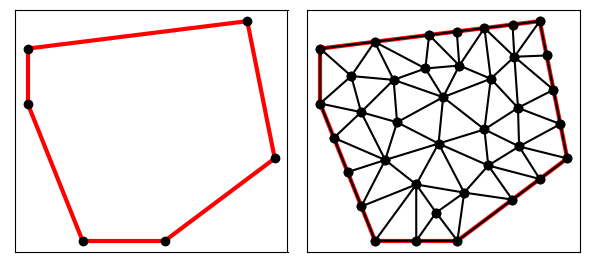

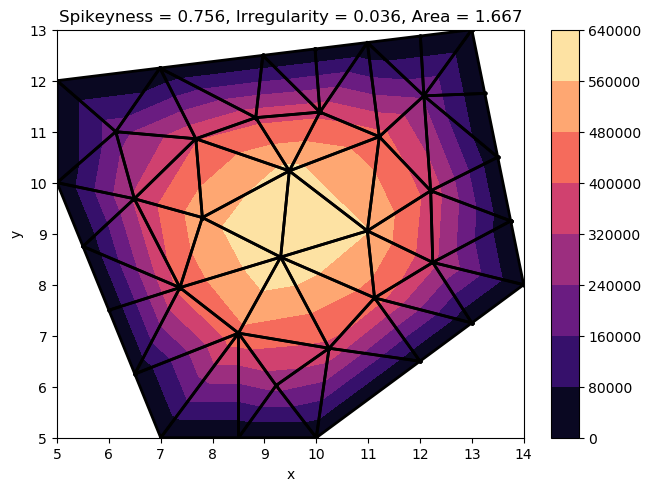

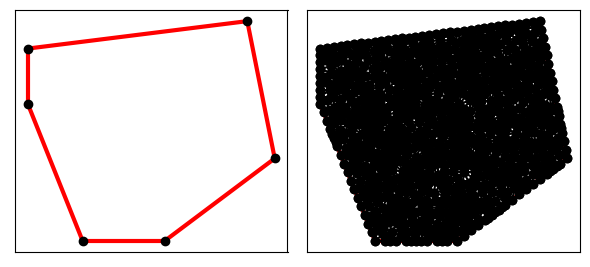

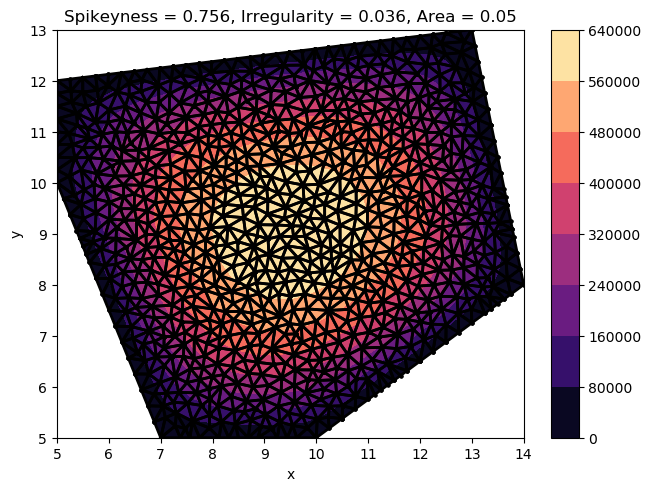

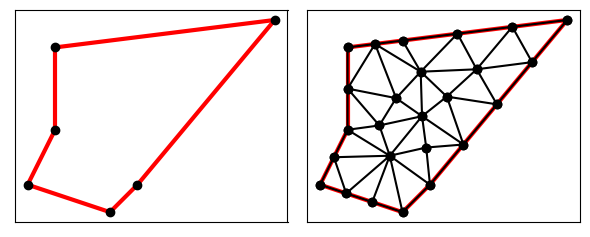

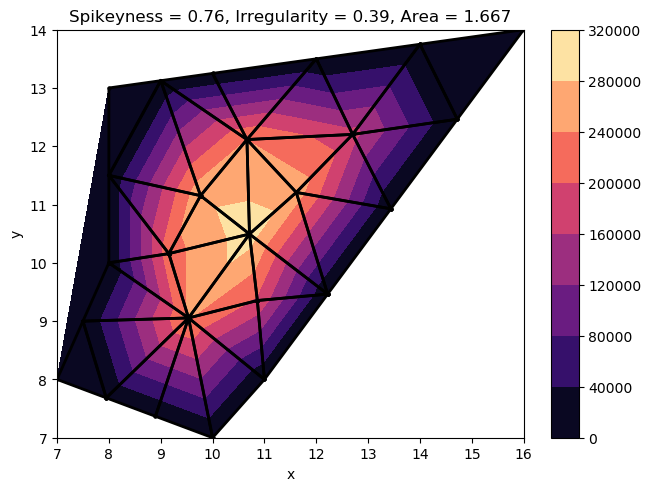

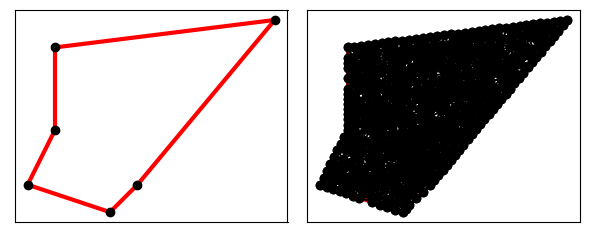

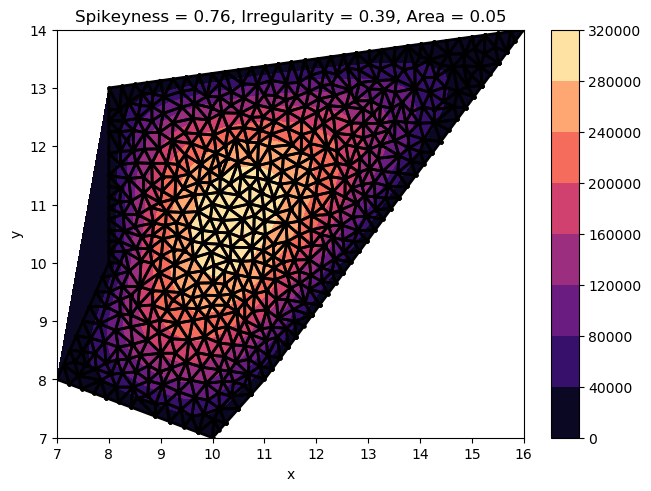

In [6]:
#En este caso no voy a entrenar sobre 3000 problemas como lo hicieron en el paper
points = [[13,  6],[14, 12],[ 9, 12],[ 2, 16],[ 5,  9],[ 8,  7]]
def problema(area,points):
    E = 200000
    v = 0.27
    G = E/(2*(1+v))

    params = Mesh.delaunay._strdelaunay(constrained=True,delaunay=True,a=area)
    vertices = points
    geometria = Mesh.Delaunay1V(vertices, params)
    zanahorias = FEM.FEM1V(geometria)
    zanahorias.generarElementos()

    a11 = lambda x,y: 1
    a12 = lambda x,y: 0
    a21 = lambda x,y: 0
    a22 = lambda x,y: 1
    a00 = lambda x,y: 0

    theta = 1
    f = lambda x,y: 2*G*theta
    zanahorias.definirCondicionesDeBorde(geometria.cbe)
    zanahorias.solucionar(cmap='magma',markersize=1,linewidth=1,a11=a11,a12=a12,a21=a21,a22=a22,a00=a00,f=f,plot=False)
    return zanahorias
def generarProblemaCompleto(geom=5,radio=5,vert=6):
    geometrias = []
    for i in range(geom):
        spk = np.random.random()
        irre = np.random.random()
        vertices = generatePolygon( 2*radio, 2*radio, radio, irregularity=spk, spikeyness=irre, numVerts=vert)
        intentos = [radio/3,radio/100]
        finitos = []
        for area in intentos:
            problemaOBJ = problema(area,vertices)
            graficarSolucionFast(problemaOBJ,figsize=None)
            ax = plt.gca()
            ax.set_title('Spikeyness = ' + format(np.round(spk,3)) + ', Irregularity = ' + format(np.round(irre,3)) + ', Area = ' + format(np.round(area,3)))
            finitos.append(problemaOBJ)
        geometrias.append([vertices,finitos])
    return geometrias
datos = generarProblemaCompleto(geom=2,vert=6)

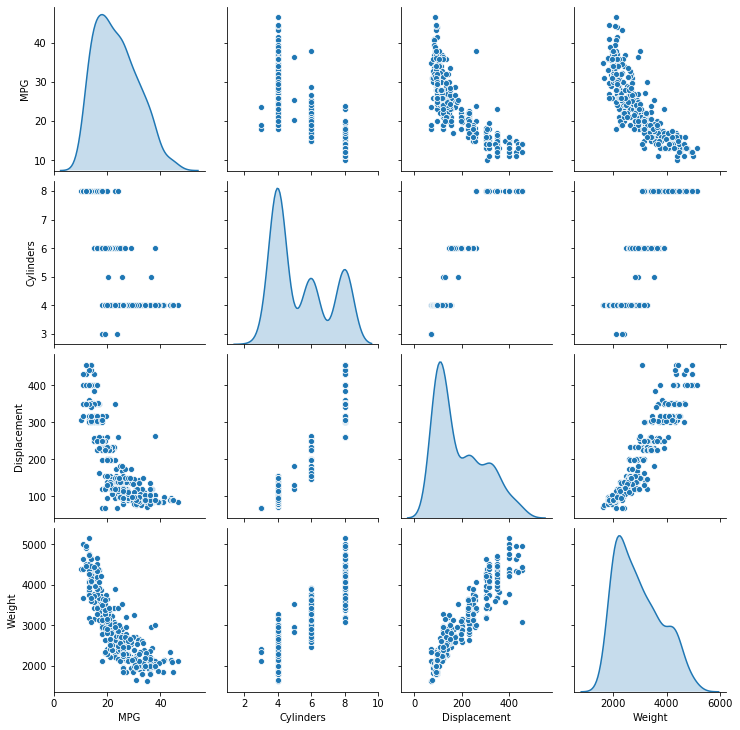

In [159]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [152]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

<H2>Creacion del modelo

In [153]:
def generarResNet(n,tipo):
    """Funcion que retorna el modelo ResNet del paper
    """
    if tipo == 1:
        #Entradas
        inputs = keras.Input(shape=(n), name="Entradas")
        #Bloque 1
        block_1_output = layers.Dense(32, activation="relu", name='Capa_1_32')(inputs)
        x = layers.Dense(32, activation="relu", name='Capa_2_32')(block_1_output)
        x = layers.Dense(64, activation="relu", name='Capa_3_64')(x)
        x = layers.Dense(128, activation="relu", name='Capa_4_128')(x)
        x = layers.Dense(64, activation="relu", name='Capa_5_64')(x)
        x = layers.Dense(32, activation="relu", name='Capa_6_32')(x)
        #Skip Connection
        x = layers.add([block_1_output, x],name='SkipConnection_suma')
        #Bloque 2
        #Salidas
        outputs = layers.Dense(1,activation='relu', name='Capa_7-Salida_1')(x)
        #Modelo completo
        model = keras.Model(inputs, outputs, name="MeshingNet_ResNet")
        
    elif tipo ==2:
        #Entradas
        inputs = keras.Input(shape=(n), name="Entradas-InicioBloque_1")
        #Bloque 1
        block_1_output = layers.Dense(32, activation="relu", name='Capa_1-FinBloque_1')(inputs)
        x = layers.Dense(32, activation="relu", name='Capa_1-InicioBloque_2')(block_1_output)
        x = layers.Dense(32, activation="relu", name='Capa_2-Bloque_2')(x)
        #Bloque 2
        #Skip Connecection 1
        block_2_output = layers.add([x, block_1_output],name='SkipConnection_1-FinBloque_2')
        x = layers.Dense(32, activation="relu", name='Capa_1-Bloque_3')(block_2_output)
        #Bloque 3
        #Skip Connection 2
        block_3_output = layers.add([block_1_output, block_2_output],name='SkipConnection_2')
        x = layers.Dense(32, activation="relu", name='Capa_1-Bloque_4')(block_3_output)
        #Bloque 4
        #Skip Connection 3
        block_4_output = layers.add([block_1_output, block_3_output],name='SkipConnection_3')
        x = layers.Dense(32, activation="relu", name='Capa_1-InicioBloque_4')(block_4_output)
        x = layers.Dense(32, activation="relu", name='Capa_2-Bloque_4')(x)
        #Salidas
        outputs = layers.Dense(1,activation='relu', name='Capa_3-FinBloque_4')(x)
        #Modelo Completo
        model = keras.Model(inputs, outputs, name="MeshingNet_ResNet2")
        
    else:
        raise Exception('El tipo de modelo debe ser 1 o 2')
    #Optimizador del modelo
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

<h2>Entrenamiento del modelo</h2>

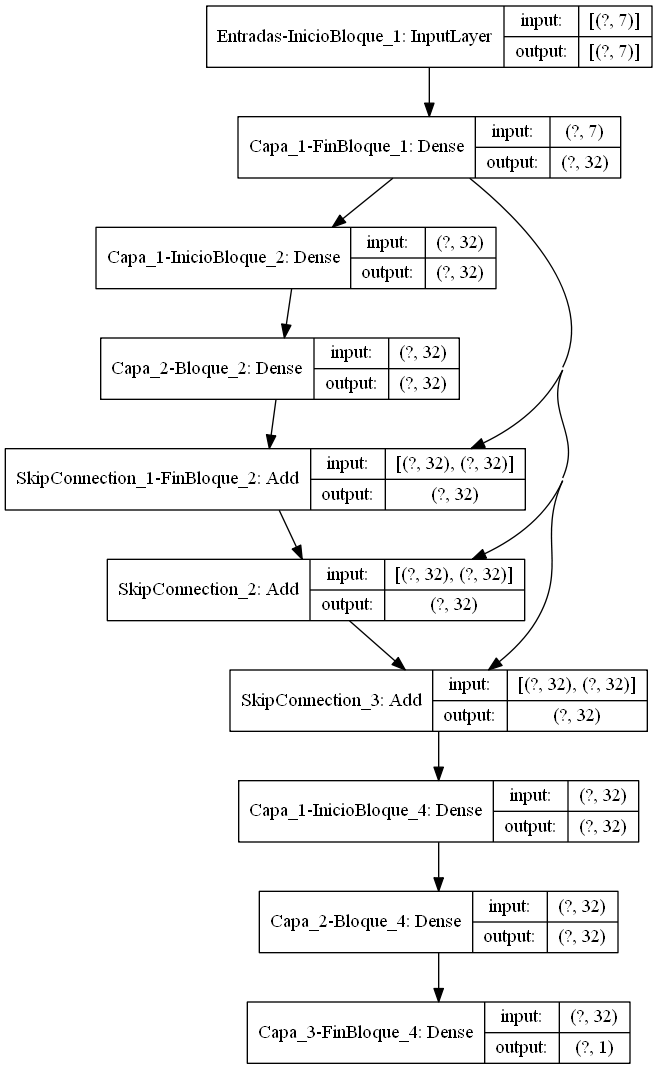

In [154]:
EPOCHS = 1000

n = len(train_dataset.keys())
model = generarResNet(n,tipo=2)
mostrarModelo(model, show_shapes=True)

In [155]:
#Entrenamiento
earlyStop = False
## Early Stop
if earlyStop:
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    ## Metodo entrenar
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=0,
      callbacks=[early_stop,tfdocs.modeling.EpochDots()])
else:
    ## Metodo entrenar
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=0,
      callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 100, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 200, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 300, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 400, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 500, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val

<h2>Validacion del modelo</h2>

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,NaN,NaN,NaN,NaN,NaN,NaN,995
996,NaN,NaN,NaN,NaN,NaN,NaN,996
997,NaN,NaN,NaN,NaN,NaN,NaN,997
998,NaN,NaN,NaN,NaN,NaN,NaN,998
999,NaN,NaN,NaN,NaN,NaN,NaN,999


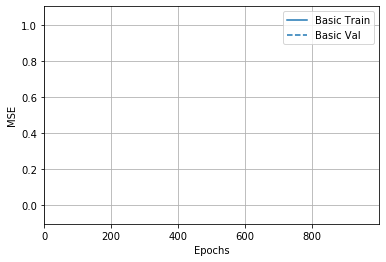

In [156]:
#Estadisticos de validacion
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE')
hist.tail()